## Feature Engineering-1 Assignment Solution

Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some
algorithms that are not affected by missing values.

Answer -  The values or data that is not present for some variable/s in the given dataset. It is important to handle missing values as missing value can impact the analysis. 
It can lead to biased in the result.
It can lead to inaccurate predictions
It can affect the generalizability of the model

Some Techniques are
# 1. Mean Value Imputation - work well with normally distributed data 
# 2. Median Value Imputation Techniques
# 3. Mode Value Imputation
# 4. Random Sampling

## Q2: List down techniques used to handle missing data. Give an example of each with python code.

# 1. Mean Value Imputation - work well with normally distributed data 
# 2. Median Value Imputation Techniques
# 3. Mode Value Imputation

In [7]:
#Mean Value Imputation
#Example

import seaborn as sns

In [8]:
df = sns.load_dataset('titanic')

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

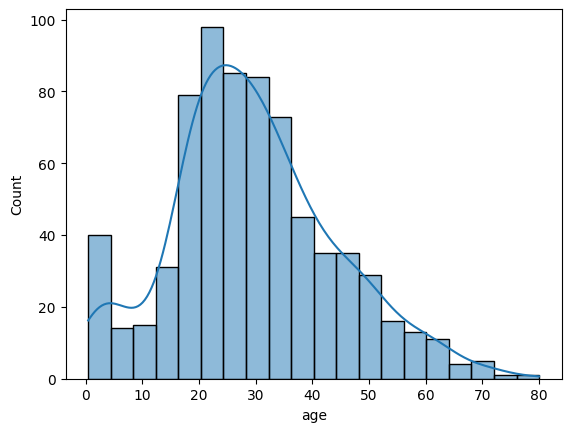

In [13]:
sns.histplot(df['age'], kde=True)

In [19]:
df['age_mean']= df['age'].fillna(df['age'].mean())

In [20]:
df[['age_mean', 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='age_mean', ylabel='Count'>

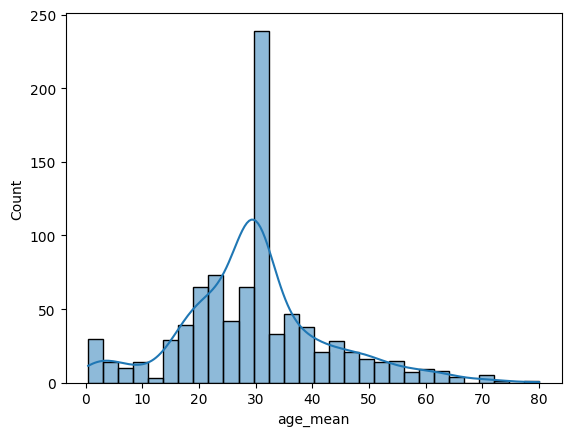

In [22]:
sns.histplot(df['age_mean'], kde=True)

## Median value imputation if we have outliers in the data set

In [24]:
df['age_median'] = df['age'].fillna(df['age'].median())

<Axes: xlabel='age_median', ylabel='Count'>

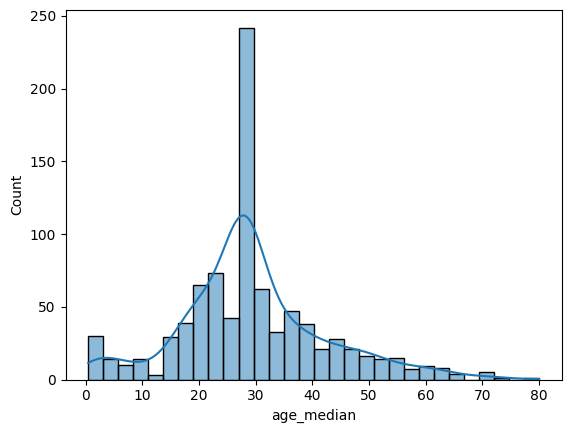

In [25]:
sns.histplot(df['age_median'], kde=True)

df[['age_median', 'age']]

In [26]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [27]:
df[['age_median', 'age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


<Axes: xlabel='age_median', ylabel='Count'>

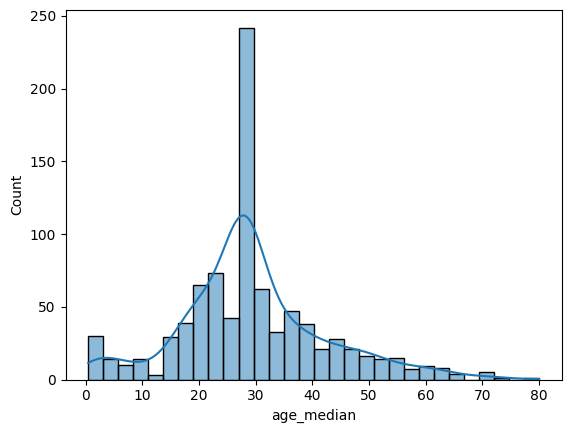

In [28]:
sns.histplot(df['age_median'], kde=True)

In [29]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [30]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [34]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [37]:
df['embarked_mode']= df['embarked'].fillna(mode_value)

In [39]:
df[['embarked_mode', 'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [40]:
df[['embarked_mode', 'embarked']].isnull().sum()

embarked_mode    0
embarked         2
dtype: int64

## Q.  Explain the imbalanced data. What will happen if imbalanced data is not handled?

Imbalance dataset will have uneven distribution of datapoints. If we dont handle it properly it will lead to a biased datamodel towards maximum no of datapoints. We should fix it by upsampling and downsampling of the data. 

Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-
sampling are required. 


## Answers Upsampling refers to upscale the minority datapoints towards the majority datapoints and downsampling means downscale the datapoints towards the minority datapoints.

Example we have 1000 datapoint.

1= 900 datapoints and 0 = 100 datapoints. So here model will be biased towards majority datapoints.

In [15]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(123)

In [4]:
n_samples =1000

In [5]:
class_ratio_0=0.9

In [6]:
n_class_0= int(n_samples*class_ratio_0)

In [7]:
n_class_1 = n_samples-n_class_0;

# create my Data frame with imbalance dataset

In [22]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target': [0] * n_class_0
})

In [35]:
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2': np.random.normal(loc=2,scale=1,size=n_class_1),
    'target': [1] * n_class_1
})

In [36]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [37]:
df.head()

,feature_1,feature_2,target
0,1.137490,-0.939884,0
1,0.337157,0.089338,0
2,0.701620,0.666814,0
3,0.502177,-0.949934,0
4,2.059647,-0.811539,0


In [38]:
df.tail()

,feature_1,feature_2,target
995,2.832328,1.496207,1
996,1.662755,0.430388,1
997,2.758163,2.239821,1
998,0.974180,2.952669,1
999,3.175903,2.868859,1


In [40]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [41]:
n_class_0, n_class_1

(900, 100)

# upsampling 

In [63]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [56]:
from sklearn.utils import resample

In [64]:
df_minority_upsampled = resample(df_minority, replace=True,n_samples=len(df_majority), random_state=42)

In [65]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,0.867837,-0.613307,1
992,2.894037,4.277351,1
914,3.384276,2.083864,1
971,2.748550,4.385846,1
960,-0.219362,2.080503,1


In [66]:
df_minority_upsampled.shape

(900, 3)

In [67]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [68]:
df_upsampled.value_counts()

feature_1  feature_2  target
 2.014364   2.869841  1         19
 3.111211   1.716001  1         18
 2.410126   3.186451  1         18
 1.616301   2.402655  1         16
 0.974180   2.952669  1         16
                                ..
-0.276591  -0.414549  0          1
-0.275396   2.086934  0          1
-0.272248  -1.249534  0          1
-0.268555   1.267204  0          1
 0.182888  -0.401373  0          1
Name: count, Length: 1000, dtype: int64

In [69]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64


## Data augmentation is the process of artificially generating new data from existing data, primarily to train new machine learning (ML) models.
## SMOTE generating synthetic instance of minority class by interpolating between existing instances.

In [81]:
## create data frames

from sklearn.datasets import make_classification


In [104]:
X,y = make_classification(n_samples=1000,n_features=2,weights=[0.90], random_state=12,n_clusters_per_class=1, n_redundant=0)
import pandas as pd
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

In [105]:
final_df = pd.concat([df1,df2], axis=1)
final_df.head()
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

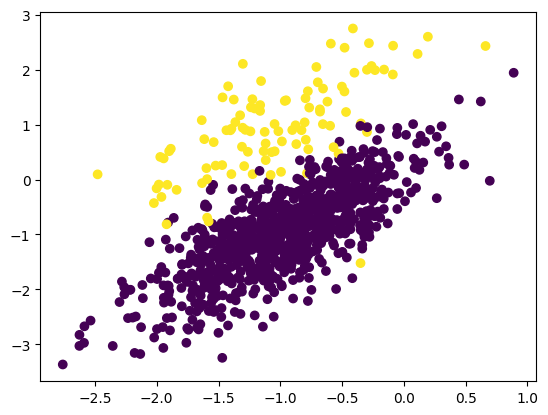

In [106]:

import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c= final_df['target'])

In [108]:
# apply smote now

!pip install imblearn

                                              0.0/258.0 kB ? eta -:--:--
     -                                        10.2/258.0 kB ? eta -:--:--
     --                                    20.5/258.0 kB 320.0 kB/s eta 0:00:01
     --------                              61.4/258.0 kB 544.7 kB/s eta 0:00:01
     -------------                         92.2/258.0 kB 655.4 kB/s eta 0:00:01
     ------------------------------         204.8/258.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 258.0/258.0 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\Naman_Sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [116]:
pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\Naman_Sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [120]:

from imblearn import under_sampling, over_sampling

ImportError: cannot import name '_get_column_indices' from 'sklearn.utils' (C:\Users\Naman_Sinha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\__init__.py)

In [121]:
!pip install imblearn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\Naman_Sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [126]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_get_column_indices' from 'sklearn.utils' (C:\Users\Naman_Sinha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\__init__.py)